# Exploratory Data Analysis

Here a very basic and superficial EDA was made.

First I imported the libraries and the FM20 dataframe

In [2]:
from src.libs import *

fm20_df = pd.read_csv("datasets/datafm20.csv")

Here I wanted to understand at what age do players have their peak, and when they devalue. As expected, this graph follows a normal distribution, with the peak being around 27/28 yo. There is a linear increase from 15-27, followed by a sharper decrease in value from 28-35 yo.

Here I removed the Goalkeepers as they will not be the focus of our investigation (as they have very specific attributes)

<AxesSubplot:xlabel='Age'>

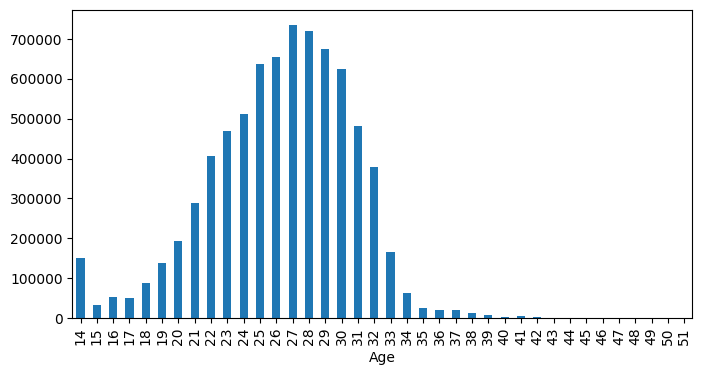

In [3]:
fm20_df_no_gk = fm20_df[:].query('`Best Pos` != "GK"')

new_fm20_df = fm20_df_no_gk[:]
new_fm20_df['POT'] = new_fm20_df['PA'] - new_fm20_df['CA']
new_fm20_df.groupby('Age')['Value'].mean().plot(kind='bar')

Here I want to add some attribute combinations as possible features, and also see if they correlate well with the player value.

In [4]:
def attribute_combinations(df, new_attr, attr_list):
    df[new_attr] = sum([df[attr] for attr in attr_list]) / len(attr_list)

new_fm20_df = fm20_df_no_gk[:][['Value', 'Age'] + PLAYER_ATTR]

attribute_combinations(new_fm20_df, 'PHY', ['Acc', 'Pac', 'Sta', 'Str', 'Agi', 'Bal', 'Jum', 'Nat'])
attribute_combinations(new_fm20_df, 'MEN', ['Wor', 'Vis', 'Tea', 'Pos', 'OtB', 'Ldr', 'Fla', 'Det', 'Dec', 'Cnt', 'Cmp', 'Bra', 'Ant', 'Agg'])
attribute_combinations(new_fm20_df, 'M+P', ['MEN', 'PHY'])
attribute_combinations(new_fm20_df, 'ATTR', PLAYER_ATTR)

As we can see here, the attribute combinations correlate better with value than any individual attribute.

In [45]:
new_fm20_df.corr()['Value'].sort_values(ascending=False).head(5)

Value    1.000000
M+P      0.292927
ATTR     0.277248
MEN      0.268462
PHY      0.266174
Name: Value, dtype: float64

As we can see here, age has a small positive correlation with the value, which was expected given that the peak of a player's valuation is more or less in the middle of his career.

In [5]:
new_fm20_df.corr()['Value'].sort_values(ascending=True).head(5)

Age    0.038035
Mar    0.067548
Ldr    0.067727
Agg    0.074689
Nat    0.079667
Name: Value, dtype: float64

Here I want to analyse the FIFA World Rankings dataframe. I will use this data to transform each country of birth into a value (and see if there is any relevance to that data)

In [41]:
fifa_wr = pd.read_csv("datasets/fifa_ranking-2021-05-27.csv")
fifa_wr.columns
fifa_wr['rank_date'].drop_duplicates()[fifa_wr['rank_date'].drop_duplicates().str.startswith('2020')].sort_values()

60744    2020-02-20
60954    2020-04-09
61164    2020-06-11
61374    2020-07-16
61584    2020-09-17
61794    2020-10-22
62004    2020-11-26
62214    2020-12-10
Name: rank_date, dtype: object

In [ ]:
fifa_wr.query('rank_date == "2020-09-17"')[['rank', 'country_abrv']]

,rank,country_abrv
61794,68,SLV
61795,69,ALB
61796,70,IRQ
61797,71,GUI
61798,76,UGA
...,...,...
61999,136,TPE
62000,134,TAN
62001,134,MYA
62002,132,COM


In [ ]:
transfermarkt_players = pd.read_csv(PROJECT_FOLDER + "datasets/players.csv")

In [ ]:
from utils import name_to_id

name_nation_mapping = fm20_df.sort_values(by='Value', ascending=False).groupby('Nation').head()[['Name', 'Nation']]
name_nation_mapping['name'] = name_nation_mapping['Name'].apply(name_to_id)
nation_mapping = name_nation_mapping.merge(transfermarkt_players[['name', 'country_of_citizenship']], on='name')
nation_mapping.drop_duplicates(subset='country_of_citizenship', inplace=True)
nation_mapping = nation_mapping[['Nation', 'country_of_citizenship']]

In [ ]:
fm20_df['Best Pos'].unique()

array(['AM (R)', 'ST (C)', 'GK', 'AM (L)', 'M (C)', 'D (C)', 'M (R)',
       'DM', 'AM (C)', 'M (L)', 'D (R)', 'D (L)', 'WB (R)', 'WB (L)'],
      dtype=object)

In [ ]:
import pandas as pd
PROJECT_FOLDER = '/home/ricardo/coding/data-science/projects/predict_value_change_from_fm_data/'

clubs = pd.read_csv(PROJECT_FOLDER + "datasets/clubs.csv")

